This notebook creates a graph representation of a Git repository, where nodes are commits and edges connect parent and child commits (Git assigns these dependencies itself).

In [4]:
%matplotlib inline
from bigbang.archive import Archive
from bigbang.analysis import repo_loader
from bigbang.ingress.git_repo import GitRepo
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [5]:
repo = GitRepo(
    ".."
)  # couldn't get get_repo to work, using the parent directory, bigbang itself, for data
full_info = repo.commit_data;

failed to add a commit because of an encoding error
failed to add a commit because of an encoding error


Nodes will be Commit objects. All we need for this representation is the HEXSHA ids to match parent and child commits. We also get the commit message to use as a label.

In [17]:
class Commit:
    def __init__(self, message, hexsha, parents):
        self.message = message
        self.hexsha = hexsha
        self.parents = parents

    def __repr__(self):
        return " ".join(self.message.split(" ")[:4])
        # using the first four words of the commit message as the label

We create a list of commits from the commit_data Pandas dataframe.

In [18]:
def get_commits():
    commits = []

    for index, row in full_info.iterrows():
        commits.append(
            Commit(row["Commit Message"], row["HEXSHA"], row["Parent Commit"])
        )

    return commits

We use the list of commits to create our graph, creating edges wherever a parent is found.

In [19]:
def make_graph(nodes):
    G = nx.Graph()

    for node in nodes:
        for other in nodes:
            if other.hexsha in node.parents:
                G.add_edge(node, other)

    return G

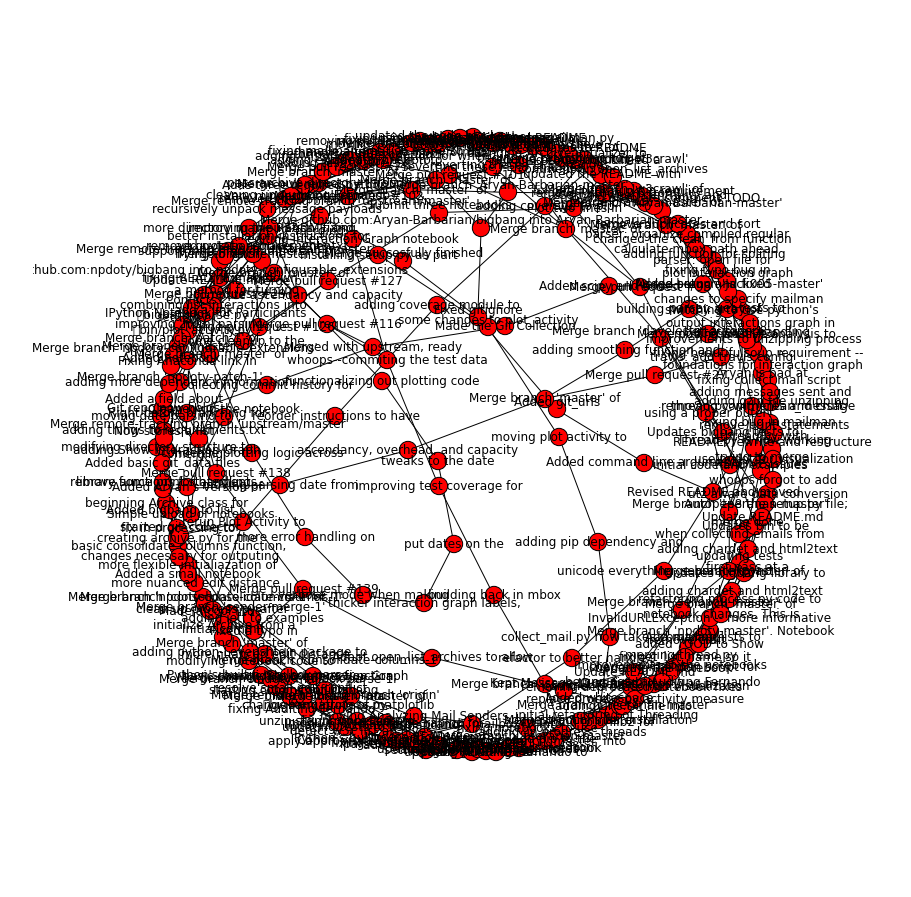

In [20]:
nodes = get_commits()
G = make_graph(nodes)

plt.figure(3, figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw(G, pos, font_size=8, with_labels=False)
nx.draw_networkx_labels(G, pos);